<a href="https://colab.research.google.com/github/karolinawegrzyn/projektPSI/blob/main/projekt_PSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przewidywanie czy uczeń pójdzie na studia
# dataset: https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset?select=data.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Przetwarzanie danych



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/karolinawegrzyn/projektPSI/main/data.csv')
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB



Kolumny:
- type_school - typ szkoły do której uczęszcza uczeń
- school_accreditation - jakość szkoły (A lub B, A jest lepsze od B)
- gender - płeć
- interest - jak zainteresowany jest uczeń w pójście na studia
- residence - rodzaj zamieszkania
- parent_age - wiek rodziców
- parent_salary - zarobki rodziców
- house_area - wielkość domu rodzinnego w metrach kwadratowych
- average_grades - średnia ocen
- parent_was_in_college - czy rodzic był na studiach
- in_college - czy na studiach


Jak widzimy nie ma w naszym datasecie missing data, jednak musimy zmienić część danych na numeryczne

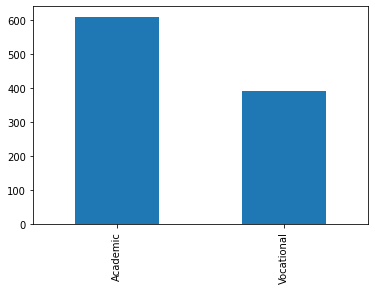

In [4]:
df['type_school'].value_counts().plot(kind='bar')
plt.show()

df['type_school'] = df['type_school'].replace({ 'Academic': 1, 'Vocational': 2})

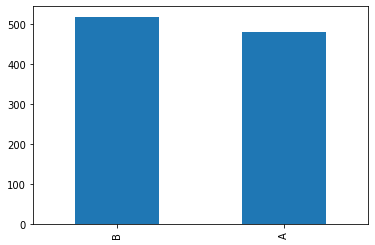

In [5]:
df['school_accreditation'].value_counts().plot(kind='bar')
plt.show()

df['school_accreditation'] = df['school_accreditation'].replace({'B' : 1, 'A': 2})

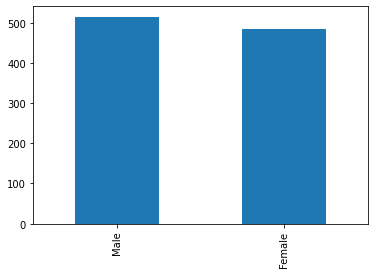

In [6]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2})

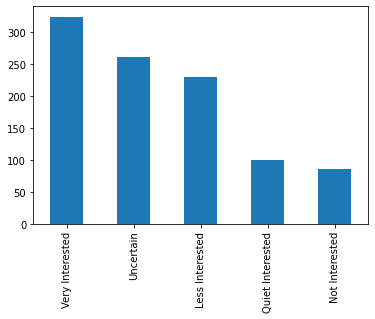

In [7]:
df['interest'].value_counts().plot(kind='bar')
plt.show()

df['interest'] = df['interest'].replace({'Not Interested': 1, 'Less Interested': 2, 'Uncertain' : 3, 'Quiet Interested': 4, 'Very Interested': 5})

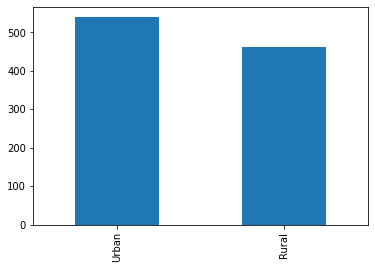

In [8]:
df['residence'].value_counts().plot(kind='bar')
plt.show()

df['residence'] = df['residence'].replace({'Urban': 1, 'Rural': 2})

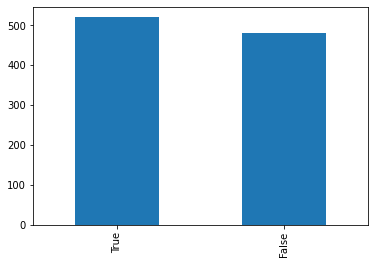

In [9]:
df['parent_was_in_college'].value_counts().plot(kind='bar')
plt.show()

df['parent_was_in_college'] = df['parent_was_in_college'].replace({True: 1, False: 0})

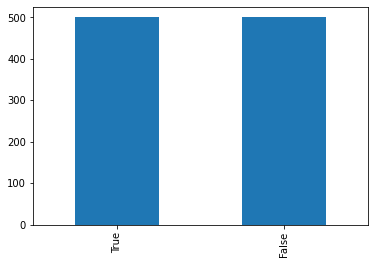

In [10]:
df['in_college'].value_counts().plot(kind='bar')
plt.show()

df['in_college'] = df['in_college'].replace({True: 1, False: 0})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   int64  
 1   school_accreditation   1000 non-null   int64  
 2   gender                 1000 non-null   int64  
 3   interest               1000 non-null   int64  
 4   residence              1000 non-null   int64  
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   int64  
 10  in_college             1000 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 86.1 KB


Jak widać wszędzie teraz mamy dane numeryczne

#Modelowanie


Dzielimy dane na treningowe i testowe

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('in_college', axis=1)
Y = df.in_college

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

Logistic Regression

In [15]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
    'preprocessing': [StandardScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

Decision Tree Classifier

In [16]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 15, 20, 40, 70],
            'classifier__max_leaf_nodes': [20, 30, 40, 50, 60, 70],
            'classifier__criterion': ['entropy', 'gini'],
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 20,
 'preprocessing': None}

Random Forest Classifier

In [17]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 5, 10, 50, 100, 200],
            'classifier__max_leaf_nodes': [20, 30, 40, 50, 60, 70],
}

grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_leaf_nodes': 70,
 'classifier__n_estimators': 200,
 'preprocessing': None}

SVM z jądrem linear

In [ ]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [00.1, 0.1, 1, 10, 100],
}

grid_4 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_4.fit(X_train, y_train)
grid_4.best_params_

SVM z jądrem rbf

In [18]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [00.1, 0.1, 1, 10, 100],
            'classifier__gamma': [0.01, 0.1, 1, 10, 100],
}

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler()}

Ada Boost

In [19]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 150, 200],
            'classifier__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5],
}

grid_6 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 150,
 'preprocessing': StandardScaler()}

In [20]:
from sklearn import  metrics


models = []
models.append(('Logistic Regression', grid_1.best_estimator_))
models.append(('Decision Tree Classifier',grid_2.best_estimator_))
models.append(('Random Forest Classifier', grid_3.best_estimator_))
#models.append(('SVM linear', grid_4.best_estimator_))
models.append(('SVM rbf', grid_5.best_estimator_))
models.append(('Ada Boosr', grid_6.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

In [21]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
dataframe = pd.DataFrame(data=d)
dataframe.insert(loc=0, column='Method', value=['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'SVM rbf', 'Ada Boost'])
dataframe

,Method,precision_score,recall_score,f1_score,accuracy_score
0,Logistic Regression,0.873786,0.833333,0.853081,0.845
1,Decision Tree Classifier,0.861386,0.805556,0.832536,0.825
2,Random Forest Classifier,0.878788,0.805556,0.840580,0.835
3,SVM rbf,0.876190,0.851852,0.863850,0.855
4,Ada Boost,0.872549,0.824074,0.847619,0.840
